In [3]:
import ROOT
import random

## Plot Formatting Examples

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


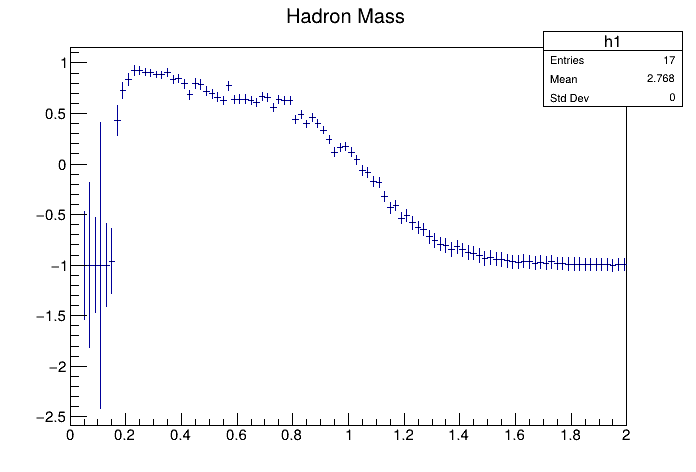

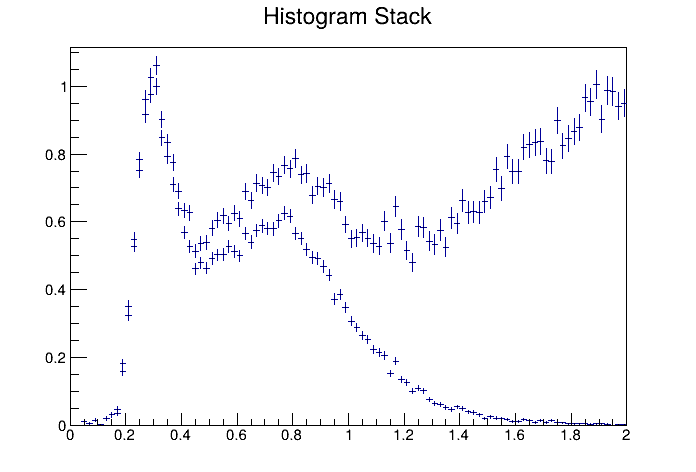

In [185]:
c1 = ROOT.TCanvas()


h1 = ROOT.TH1F("h1","Hadron Mass",100,0,2)
h2 = ROOT.TH1F("h2", "Missing Mass",100,0,2)
for entry in t:
    h1.Fill(entry.Mh)
    h2.Fill(entry.Mx)

h1.Scale(1/h1.GetMaximum())
h2.Scale(1/h2.GetMaximum())

h3 = ROOT.TH1F()
h3 = (h1-h2)/(h1+h2)
#h1.Add(h2)

#h1.Draw("h1")
#h2.Draw("same")
h3.Draw()
c1.Draw()

c2 = ROOT.TCanvas()
hstack = ROOT.THStack("hstack","Histogram Stack")
hstack.Add(h1)
hstack.Add(h2)
#hstack.SetFillColor(ROOT.kGreen) #color-opacity
hstack.Draw()
c2.Draw("nostack")



In [73]:
print(ROOT.TColor.GetColorByName("red"))

2


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      373.685
NDf                       =           12
Edm                       =  2.58989e-06
NCalls                    =           61
Constant                  =      639.816   +/-   11.3716     
Mean                      =     0.131161   +/-   0.00022677  
Sigma                     =    0.0142558   +/-   0.000208698  	 (limited)


Warning in <TFile::Append>: Replacing existing TH1: hformat (Potential memory leak).


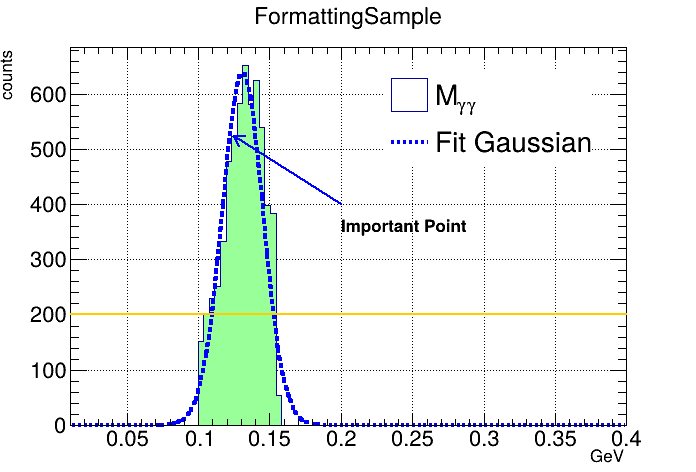

In [163]:
c = ROOT.TCanvas()
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

fit = ROOT.TF1("fit","gaus",0.1,155) #"name","fit_type",min,max
fit.SetLineWidth(4)
fit.SetLineColor(ROOT.kBlue)
fit.SetLineStyle(2)

hformat=ROOT.TH1F("hformat","FormattingSample;GeV;counts",100,0.01,0.4) #"name","title;xaxis;yaxis",bin number,min,max
hformat.SetStats(0)
hformat.SetFillColor(ROOT.kGreen-9) #color-opacity
hformat.GetXaxis().SetTitleSize(0.04)
hformat.GetYaxis().SetTitleSize(0.04)
hformat.GetXaxis().SetLabelSize(0.05)
hformat.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"M_{#gamma#gamma}","f") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(fit,"Fit Gaussian","l")
leg.SetBorderSize(0)

line=ROOT.TLine(0.01,200,0.4,200) #xmin,ymin,xmax,ymax)
line.SetLineWidth(2)
line.SetLineColor(ROOT.kOrange)

text=ROOT.TLatex(0.2,350,"Important Point")
text.SetTextSize(0.04)


#t.Draw("Mdiphoton>>h")
t.Fit("fit","Mdiphoton>>hformat","Mdiphoton>0.1&&Mdiphoton<0.155")

x0=0.125
index=hformat.FindBin(x0)
y0=hformat.GetBinContent(index)
arrow=ROOT.TArrow(0.2,400,x0,y0)
arrow.SetLineWidth(2)
arrow.SetArrowSize(0.02)
arrow.SetLineColor(ROOT.kBlue)

leg.Draw()
line.Draw()
arrow.Draw()
text.Draw()
c.Draw()

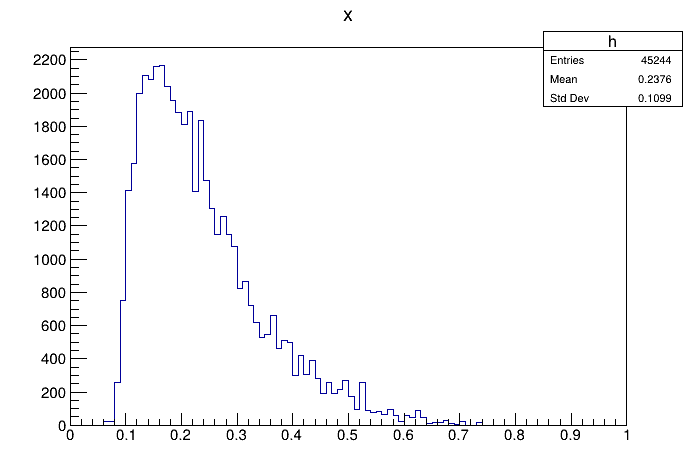

In [147]:
c = ROOT.TCanvas()
t.Draw("x>>h(100,0,1)")
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h2D (Potential memory leak).


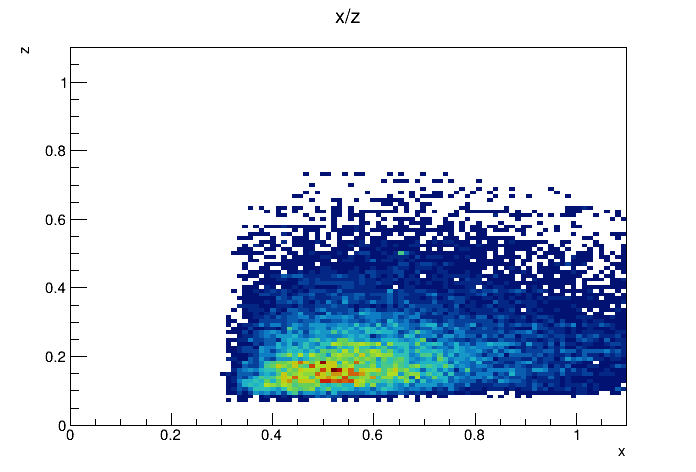

In [158]:
c = ROOT.TCanvas()
h2D = ROOT.TH2F("h2D","x/z;x;z",100,0,1.1,100,0,1.1)#xbins,xmin,xmax,ybins,ymin,ymax
h2D.SetStats(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
t.Draw("x:z>>h2D")
c.Draw()

#### Formatting Template

In [5]:
f = ROOT.TFile("out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root")
f.ls()

TFile**		out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root	
 TFile*		out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root	
  KEY: TTree	EventTree;1	EventTree
  KEY: TTree	pippi0;1	Tree


In [12]:
tFin = f.Get("pippi0")
[b.GetName() for b in tFin.GetListOfBranches()]

['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true']

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


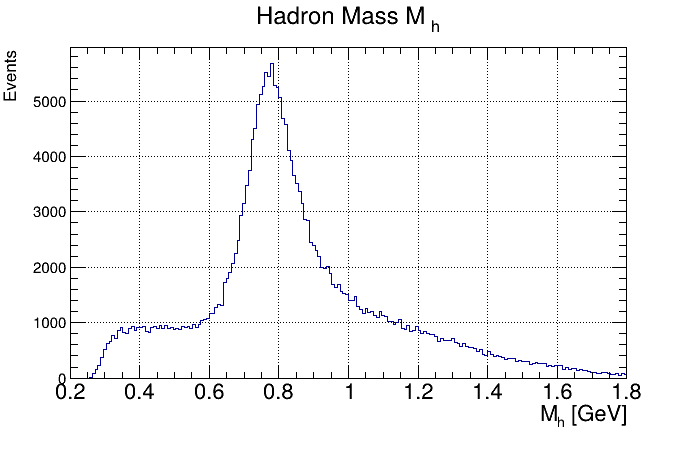

In [33]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.2,1.8)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

ROOT.gPad.SetBottomMargin(0.2)


tFin.Draw("Mh>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
c.Draw()

## Chaining all RGA data

In [4]:
import os

In [5]:
base = ["pippi0_fall2018_in_pass2","pippi0_spring2019_in_pass2"]

In [6]:
chain = ROOT.TChain("pippi0")

for file in base:
    chain.Add(os.path.join("out",file,file+".root"))
print( chain.GetEntries())
[b.GetName() for b in chain.GetListOfBranches()]

40941520


['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true',
 'th',
 'th_true',
 'cth',
 'cth_true',
 'containsNeutron',
 'MCtrue_containsNeutron',
 'truepho1_pid',
 'truepho2_pid',
 'truepip_pid',
 'trueelectron_pid',
 'MCpippi0parent_samerho',
 'MCphoparent_samepi0',
 'truepipparent_pid',
 'truepipparent_id',
 'truepho2parentparent_pid',
 'truepho2parentparent_id',
 'truepho2parent_pid',
 'truepho2parent_id',
 'truepho1parentparent_pid',
 'truepho1parentparent_id',
 'truepho1parent_pid',
 'truepho1parent_id',
 't_elec',
 't_elec_true',
 'MCtrue_exclusive',
 'exclusive']

In [7]:
from ROOT import RooFit,RooDataSet,RooRealVar,RooDataHist

In [8]:
obs_str = "z"
obsmin = 0.66
obsmax = 0.74
obs2_str = "cth"
obs2min = -1
obs2max = 1

Mh = RooRealVar("Mh", "Mh", 0.4, 1.7)
Mh.setRange("fullRange",0.4,1.5)
Mx = RooRealVar("Mx", "Mx", 0, 1.7)
p1 = RooRealVar("p1", "p1", 0,-1,1)
p2 = RooRealVar("p2", "p2", 0,-1,1)
p3 = RooRealVar("p3", "p3", 0,-1,1)
p4 = RooRealVar("p4", "p4", 0,-1,1)
sigh = RooRealVar("#sigma_{R}", "sig_R", 0.06,0.00001, 0.1)
mu = RooRealVar("m_{0}", "mu", 0.8,0.6, 1)
Mdiphoton = RooRealVar("Mdiphoton","Mdiphoton",0.115,0.16)
obs2 = RooRealVar(f"{obs2_str}",f"{obs2_str}",obs2min,obs2max)
obs = RooRealVar(f"{obs_str}",f"{obs_str}",obsmin,obsmax)
N_sig = RooRealVar("N_{sig}", "N_sig", 10000,0,chain.GetEntries())
N_bkg = RooRealVar("N_{bkg}", "N_bkg", 10000,0,chain.GetEntries())

sig = ROOT.RooGaussian("sig","gaussian Fit",Mh,mu,sigh)   
pars_pol = ROOT.RooArgList(p1,p2,p3,p4)
background = ROOT.RooChebychev("background", "Background", Mh, pars_pol)
    
# Combine signal and background
model_ext = ROOT.RooAddPdf("model_ext", "Signal + Background", ROOT.RooArgList(sig, background), ROOT.RooArgList(N_sig,N_bkg))
cut_str = f"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 && {obs_str}>{obsmin} && {obs_str}<{obsmax}&& {obs2min}<{obs2_str}&&{obs2_str}<{obs2max}"
roo_DS = RooDataSet("roo_DS","roo_DS",chain,ROOT.RooArgSet(Mh,Mdiphoton,Mx,obs,obs2),cut_str)

[#1] INFO:Eval -- RooRealVar::setRange(Mh) new range named 'fullRange' created with bounds [0.4,1.5]
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roo_DS) Skipping event #0 because Mdiphoton cannot accommodate the value 0.172872
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roo_DS) Skipping event #1 because Mdiphoton cannot accommodate the value 0.172872
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roo_DS) Skipping event #2 because Mdiphoton cannot accommodate the value 0.323943
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roo_DS) Skipping event #3 because Mx cannot accommodate the value 2.1365
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(roo_DS) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(roo_DS) Ignored 39823672 out-of-range events


In [9]:
fit_results = model_ext.fitTo(roo_DS,RooFit.Range("fullRange"),
                                  RooFit.Save(),RooFit.PrintLevel(-1),Extended = True)

[#1] INFO:Eval -- RooRealVar::setRange(Mh) new range named 'fit_nll_model_ext_roo_DS' created with bounds [0.4,1.5]
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model_ext) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx512
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_ext_roo_DS) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (-151576) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	#sigma_{R}=0.0807957	N_{bkg}=11195.8	N_{sig}=7285.13	m_{0}=0.802544	p1=-0.608975	p2=-0.110069	p3=0.614567	p4=0.342235
RooAddPdf::model_ext[ N_{sig} * sig_over_sig_Int[Mh] + N_{bkg} * background_over_background_Int[Mh] ]
     getLogVal() top-level p.d.f evaluates to NaN @ !refCoefNor

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_ext) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.removeStringAttribute("fitrange");
	- Explicitly specify the plotting range: Range("<rangeName>").
	- Explicitly specify where to compute the normalisation: NormRange("<rangeName>").
	The default (full) range can be denoted with Range("") / NormRange("").
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_ext) only plotting range 'fit_nll_model_ext_roo_DS'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_ext) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_ext_roo_DS'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model_ext) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attr

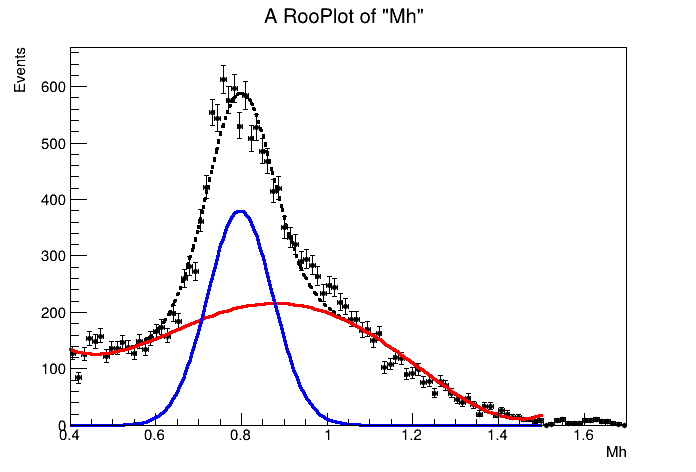

In [10]:
frame = Mh.frame(0.4,1.7)
frame.SetYTitle("Events")
roo_DS.plotOn(frame,RooFit.MarkerSize(0.5),
            RooFit.Name("data")) #RooFit.Binning(50)
model_ext.plotOn(frame,RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kBlack),
            RooFit.Name("totalFit"))
model_ext.plotOn(frame, RooFit.Components("background"), RooFit.LineColor(ROOT.kRed),
            RooFit.Name("bkgFit"))
model_ext.plotOn(frame, RooFit.Components("sig"), RooFit.LineColor(ROOT.kBlue),
            RooFit.Name("sigFit"))
c = ROOT.TCanvas()
frame.Draw()
c.Draw()

In [11]:
def calc_chi2ndf(roo_DS,RooVar,model,nbins):
    RooVar.setBinning(ROOT.RooBinning(nbins,Mh.getMin("fullRange"),Mh.getMax("fullRange")))
    roo_dh = RooDataHist("roo_dh","roo_dh",ROOT.RooArgSet(RooVar),roo_DS)
    
    chi2_var = model.createChi2(roo_dh,RooFit.Range("fullRange"),RooFit.Extended(True),RooFit.DataError(ROOT.RooAbsData.Poisson))
    nparams = model.getParameters(roo_DS).getSize()
    
    nonzero_bins = 0
    for i in range(dummy_nbins):
        # index array: For 1D hist, the bin index is just [i]
        content = roo_dh.weight(i)
        if content > 0:
            nonzero_bins += 1
    ndf = nonzero_bins - nparams
    print(f"nonzero_bins = {nonzero_bins}")
    purechi2 = chi2_var.getVal()
    chi2pNDF = purechi2/ndf
    del roo_dh
    del chi2_var

    return purechi2,chi2pNDF

In [12]:
nbins = 100

purechi2,chi2ndf = calc_chi2ndf(roo_DS,Mh,model_ext,nbins)
print(f"pure chi2:{purechi2}")
print(f"chi2/NDF: {chi2ndf}")

NameError: name 'dummy_nbins' is not defined

In [ ]:
frame_clone = Mh_clone.frame(0.4,1.7)
frame_clone.SetYTitle("Events")
roo_DS_clone.plotOn(frame_clone,RooFit.MarkerSize(0.5),
            RooFit.Name("data")) #RooFit.Binning(50)
model_clone.plotOn(frame_clone,RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kBlack),
            RooFit.Name("totalFit"))
model_clone.plotOn(frame_clone, RooFit.Components("background"), RooFit.LineColor(ROOT.kRed),
            RooFit.Name("bkgFit"))
model_clone.plotOn(frame_clone, RooFit.Components("sig"), RooFit.LineColor(ROOT.kBlue),
            RooFit.Name("sigFit"))
c = ROOT.TCanvas()
frame_clone.Draw()
c.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       58.221
NDf                       =           53
Edm                       =  2.95975e-06
NCalls                    =           61
Constant                  =      40.4581   +/-   1.6536      
Mean                      =    0.0661331   +/-   0.0310308   
Sigma                     =      0.93325   +/-   0.0239629    	 (limited)


Warning in <TROOT::Append>: Replacing existing TH1: dummy_hist (Potential memory leak).


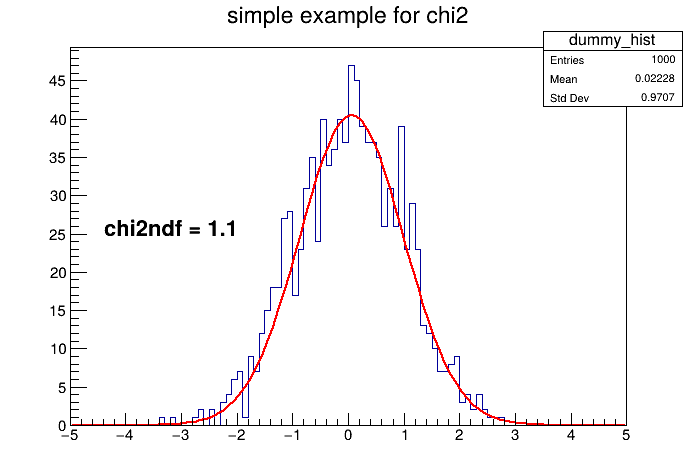

In [73]:
dummy_nbins = 100
dummy_hist = ROOT.TH1F("dummy_hist","simple example for chi2",dummy_nbins,-5,5)
for i in range(1000):
    val = random.gauss(0,1)
    dummy_hist.Fill(val)
fit_results_dummy = dummy_hist.Fit("gaus","S")
chi2_dummy = fit_results_dummy.Chi2()
NDF_dummy = fit_results_dummy.Ndf()
chi2ndf_dummy = chi2_dummy/NDF_dummy

text = ROOT.TLatex(0.15,0.5,f"chi2ndf = {round(chi2ndf_dummy,2)}")
text.SetNDC(True)

c = ROOT.TCanvas()
dummy_hist.Draw()
dummy_hist.GetListOfFunctions().At(0).SetLineColor(ROOT.kRed)
text.Draw()
c.Draw()

In [51]:
n_nonzero = 0
for i in range(1, dummy_hist.GetNbinsX()+1):
    content = dummy_hist.GetBinContent(i)
    if content > 0:
        n_nonzero += 1
print(n_nonzero)

57


In [30]:
x = RooRealVar("x", "x", -5, 5)
mu_dummy = RooRealVar("mu_dummy","mu_dummy",-0.1,-1,1)
sig_dummy = RooRealVar("sig_dummy","sig_dummy",1.1,0.01,2)
gauss = ROOT.RooGaussian("gauss","gaussian Fit",x,mu_dummy,sig_dummy)
dummy_DH = RooDataHist("dummy_DH","dummy_DH",ROOT.RooArgSet(x),dummy_hist)

dummy_results = gauss.fitTo(dummy_DH,RooFit.Save())


[#1] INFO:Fitting -- RooAbsPdf::fitTo(gauss_over_gauss_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_gauss_over_gauss_Int[x]_dummy_DH) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 1422.03814086312309
Edm   = 0.000104544429881312927
Nfcn  = 32
mu_dummy	  = -0.000868444	 +/-  0.0317257	(limited)
sig_dummy	  = 1.00341	 +/-  0.0224476	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       1434.110505 Edm =       12.66434924 NCalls =      9
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 1434.110505
  Edm           : 12.66434924
  Internal parameters:	[    -0.1001674212    0.09562304613]	
  Internal gradient  :	[     -81.64474159      144.1892545]	
  Internal covariance matrix:
[[   0.0024695259              0]
 [              0   0.0016447804]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       1434.110505 Edm =       12.66434924 NCalls =      9
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       1422.144332 Edm =        0.13608561 NCalls =     16
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       1422.038141 Edm =   0.0001364309785 NCalls =     22
Info in <Minuit2>: VariableMetr

55


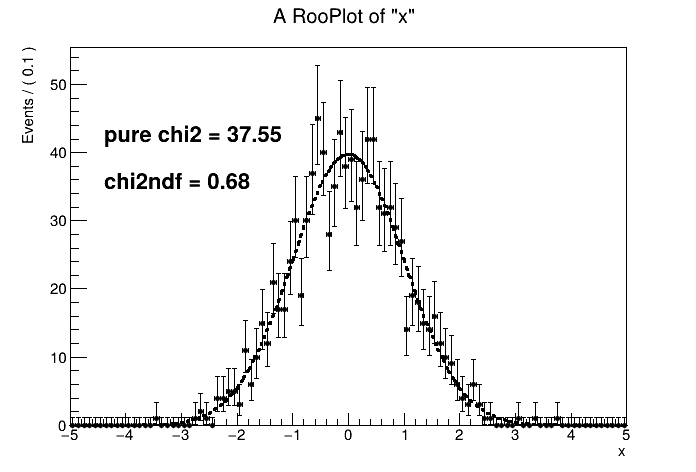

In [55]:
dummy_frame = x.frame(-5,5)

dummy_DH.plotOn(dummy_frame,RooFit.MarkerSize(0.5),
            RooFit.Name("dummy_data")) #RooFit.Binning(50)
gauss.plotOn(dummy_frame,RooFit.LineStyle(ROOT.kDashed),RooFit.LineColor(ROOT.kBlack),
            RooFit.Name("dummy_totalFit"))

chi2_var = gauss.createChi2(dummy_DH,RooFit.DataError(ROOT.RooAbsData.Poisson))
nparams = gauss.getParameters(dummy_DH).getSize()
nonzero_bins = 0
for i in range(dummy_nbins):
    # index array: For 1D hist, the bin index is just [i]
    content = dummy_DH.weight(i)
    if content > 0:
        nonzero_bins += 1

ndf = nonzero_bins - nparams
print(ndf)
chi2pNDF = chi2_var.getVal()/ndf

c = ROOT.TCanvas()
chi2pure = ROOT.TLatex(0.15,0.7,f"pure chi2 = {round(chi2_var.getVal(),2)}")
chi2pure.SetNDC(True)
dummy_chi2ndf = ROOT.TLatex(0.15,0.6,f"chi2ndf = {round(chi2pNDF,2)}")
dummy_chi2ndf.SetNDC(True)

dummy_frame.Draw()
chi2pure.Draw()
dummy_chi2ndf.Draw()
c.Draw()

In [50]:

chain.Draw("Mx>>h(100,0.6,1.5)","","")
chain.Draw("Mx>>h1(100,0.6,1.5)","0.115<Mdiphoton&&Mdiphoton<0.16","")
chain.Draw("Mx>>h2(100,0.6,1.5)","0.115<Mdiphoton&&Mdiphoton<0.16 && 0.65<Mh&&Mh<0.9","")



6433442

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


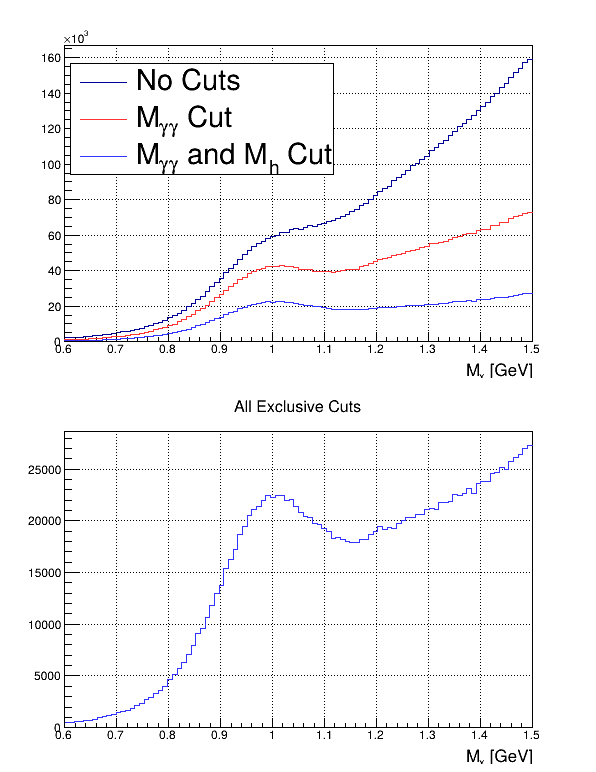

In [54]:
c = ROOT.TCanvas("c","c",600,800)
c.Divide(1,2)


h = ROOT.gDirectory.Get("h")
h1 = ROOT.gDirectory.Get("h1")
h2 = ROOT.gDirectory.Get("h2")

h.SetTitle("")
h.GetXaxis().SetTitle("M_{x} [GeV]")
h.GetXaxis().SetTitleSize(0.05)
h.SetStats(0)
h2.SetStats(0)
h1.SetLineColor(ROOT.kRed-4)
h2.SetLineColor(ROOT.kBlue-4)

leg = ROOT.TLegend(0.11,0.55,0.56,0.85)
leg.AddEntry(h,"No Cuts","l")
leg.AddEntry(h1,"M_{#gamma#gamma} Cut","l")
leg.AddEntry(h2,"M_{#gamma#gamma} and M_{h} Cut","l")

c.cd(1)
ROOT.gPad.SetGrid()
h.Draw()
h1.Draw("SAME")
h2.Draw("SAME")
leg.Draw()
c.cd(2)
ROOT.gPad.SetGrid()
h2.SetTitle("All Exclusive Cuts")
h2.GetXaxis().SetTitle("M_{x} [GeV]")
h2.GetXaxis().SetTitleSize(0.05)
h2.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


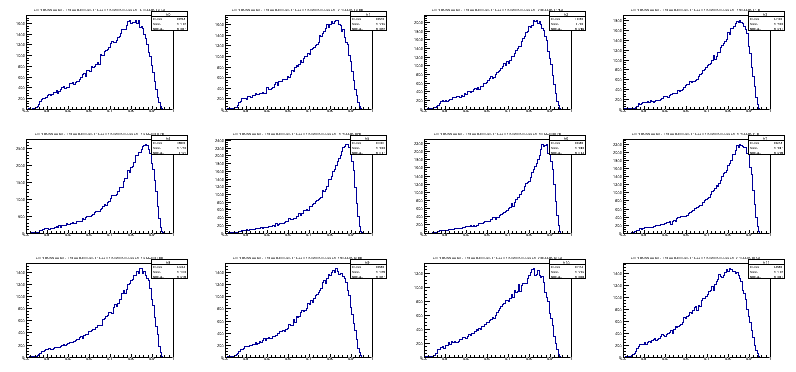

In [26]:
c = ROOT.TCanvas("c","c",800,400)
c.Divide(4,3)
phibn_edges = [-3.14,-2.74,-2.38,-1.94,-1.5, -0.75,0.0,0.75,1.5,1.94,2.38,2.74, 3.14]

for bn in range(len(phibn_edges)-1):
    c.cd(bn+1)
    chain.Draw(f"eps>>h{bn}(100,0.3,1)",f"0.85<Mx && Mx < 1.05 && Mdiphoton<0.16 && 0.115<Mdiphoton && phi>{phibn_edges[bn]} && phi<{phibn_edges[bn+1]}","")

c.Draw()

1


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


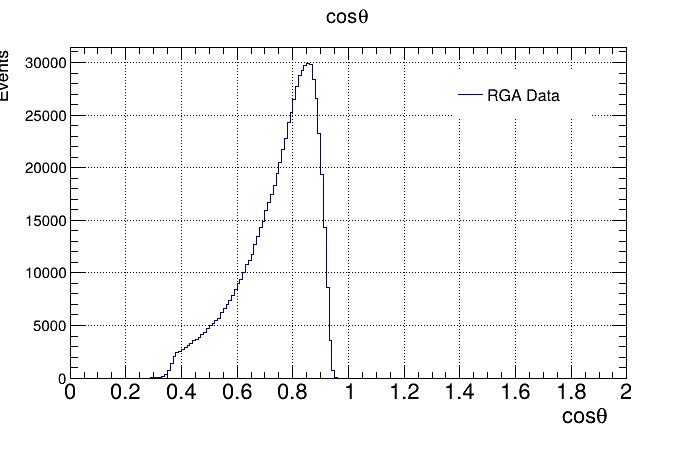

In [7]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","cos#theta;cos#theta ;Events",200,0,2)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
maxval = h.GetBinContent(h.GetMaximumBin())
print(h.GetMaximumBin())
#h.GetYaxis().SetRangeUser(0,maxval)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)

chain.Draw("eps>>h","0.85<Mx && Mx < 1.05 && Mdiphoton<0.16 && 0.115<Mdiphoton","")
leg.Draw()
c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


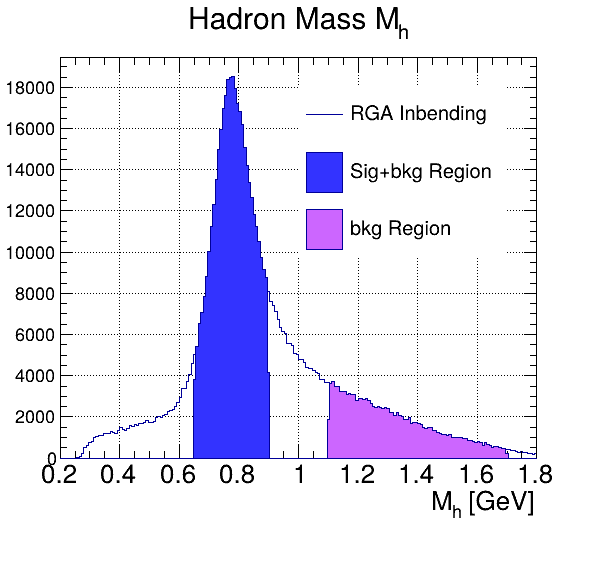

In [16]:
 c = ROOT.TCanvas("c","c",600,600)#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.2,1.8)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)
h.SetStats(0)
h1 = ROOT.TH1F("h1","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.2,1.8)
h1.SetFillColor(ROOT.kBlue-4)
h2 = ROOT.TH1F("h2","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.2,1.8)
h2.SetFillColor(ROOT.kViolet-4)

leg = ROOT.TLegend(0.50,0.55,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Inbending","l") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(h1,"Sig+bkg Region","f")
leg.AddEntry(h2,"bkg Region","f")
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)

chain.Draw("Mh>>h","Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05","") 
chain.Draw("Mh>>h1","Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05 && 0.65<Mh&&Mh<0.9","") 
chain.Draw("Mh>>h2","Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05 && 1.1<Mh&&Mh<1.7","") 


h.Draw()
h1.Draw("SAME")
h2.Draw("SAME")
leg.Draw()
c.Draw()

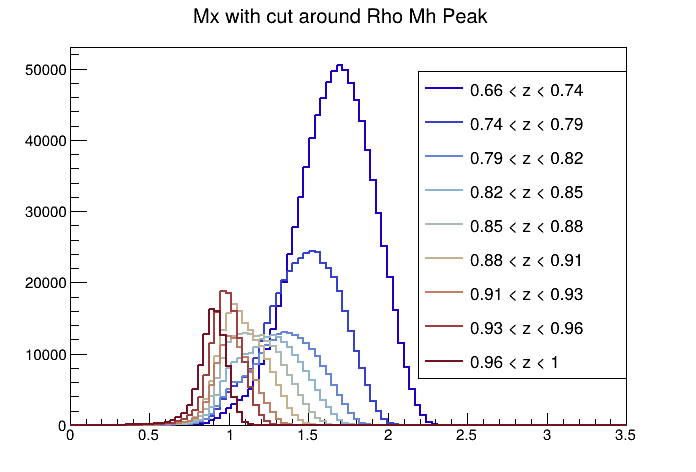

In [18]:
c_Mxvsz = ROOT.TCanvas()
ROOT.gStyle.SetPalette(ROOT.kThermometer)
zbin_edgs = [0.66, 0.74, 0.79, 0.82, 0.85, 0.88, 0.91, 0.93, 0.96, 1]
nbins = len(zbin_edgs)-1
baseColor = 51
histograms = []
for i in range(nbins):
    chain.Draw(f"Mx>>h{i}(100,0,3.5)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&0.65<Mh&&Mh<0.9&& {zbin_edgs[i]}<z&&z<{zbin_edgs[i+1]}","goff")

    hist = ROOT.gDirectory.Get(f"h{i}")
    hist.SetLineWidth(2)
    #color = baseColor + int((float(i) / (nbins - 1)) * 5)
    #hist.SetLineColor(color)
    histograms.append(hist)
c_Mxvsz.cd()
leg = ROOT.TLegend(0.6,0.2,0.9,0.85)
for i, hist in enumerate(histograms):
    leg.AddEntry(hist,f"{zbin_edgs[i]} < z < {zbin_edgs[i+1]}","l")
    if i ==0:
        hist.SetStats(0)
        hist.SetTitle("Mx with cut around Rho Mh Peak")
        hist.Draw("PLC")
    else:
        hist.Draw("PLC SAME")

leg.Draw()
c_Mxvsz.Draw()

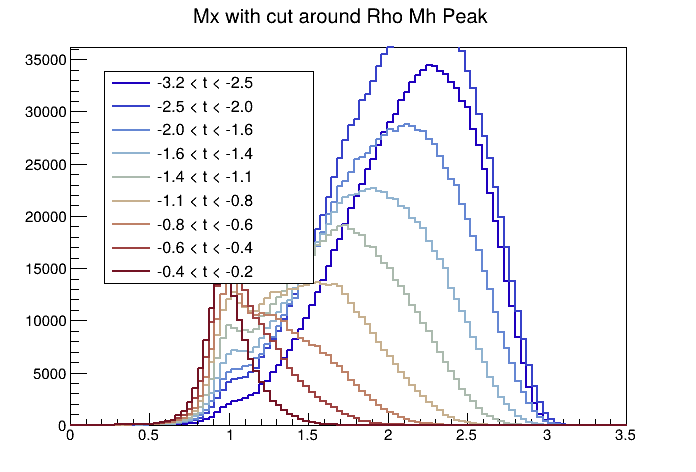

In [49]:
c_Mxvsz = ROOT.TCanvas()
ROOT.gStyle.SetPalette(ROOT.kThermometer)
tbin_edgs = [-3.21, -2.53, -1.99, -1.64, -1.35, -1.08, -0.83, -0.62, -0.4, -0.17]
nbins = len(tbin_edgs)-1
baseColor = 51
histograms = []
for i in range(nbins):
    chain.Draw(f"Mx>>h{i}(100,0,3.5)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&0.65<Mh&&Mh<0.9&& {tbin_edgs[i]}<t_elec&&t_elec<{tbin_edgs[i+1]}","goff")

    hist = ROOT.gDirectory.Get(f"h{i}")
    hist.SetLineWidth(2)
    #color = baseColor + int((float(i) / (nbins - 1)) * 5)
    #hist.SetLineColor(color)
    histograms.append(hist)
c_Mxvsz.cd()
leg = ROOT.TLegend(0.15,0.4,0.45,0.85)
for i, hist in enumerate(histograms):
    leg.AddEntry(hist,f"{round(tbin_edgs[i],1)} < t < {round(tbin_edgs[i+1],1)}","l")
    if i ==0:
        hist.SetStats(0)
        hist.SetTitle("Mx with cut around Rho Mh Peak")
        hist.Draw("PLC")
    else:
        hist.Draw("PLC SAME")

leg.Draw()
c_Mxvsz.Draw()

18198.0
36584.0
40420.0
61768.0
90054.0
124280.0
100060.0
159890.0
119320.0


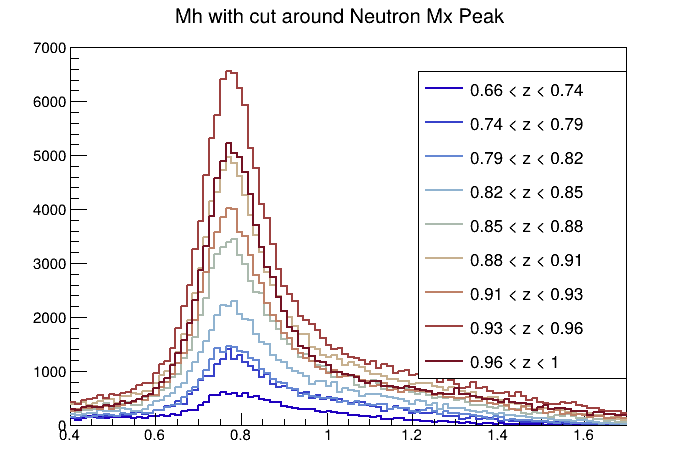

In [7]:
c_Mxvsz = ROOT.TCanvas()
ROOT.gStyle.SetPalette(ROOT.kThermometer)
zbin_edgs = [0.66, 0.74, 0.79, 0.82, 0.85, 0.88, 0.91, 0.93, 0.96, 1]
nbins = len(zbin_edgs)-1
baseColor = 51
histograms = []
for i in range(nbins):
    chain.Draw(f"Mh>>h{i}(100,0.4,1.7)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05&& {zbin_edgs[i]}<z&&z<{zbin_edgs[i+1]}","goff")

    hist = ROOT.gDirectory.Get(f"h{i}")
    hist.SetLineWidth(2)
    #color = baseColor + int((float(i) / (nbins - 1)) * 5)
    #hist.SetLineColor(color)
    histograms.append(hist)
    print(hist.GetEntries())
c_Mxvsz.cd()
leg = ROOT.TLegend(0.6,0.2,0.9,0.85)
for i, hist in enumerate(histograms):
    leg.AddEntry(hist,f"{zbin_edgs[i]} < z < {zbin_edgs[i+1]}","l")
    if i ==0:
        hist.SetStats(0)
        hist.SetTitle("Mh with cut around Neutron Mx Peak")
        hist.GetYaxis().SetRangeUser(0,7000)
        hist.Draw("PLC")
    else:
        hist.Draw("PLC SAME")

leg.Draw()
c_Mxvsz.Draw()

18198.0
36584.0
40420.0
61768.0
90054.0
124280.0
100060.0
159890.0
119320.0


IOStream.flush timed out


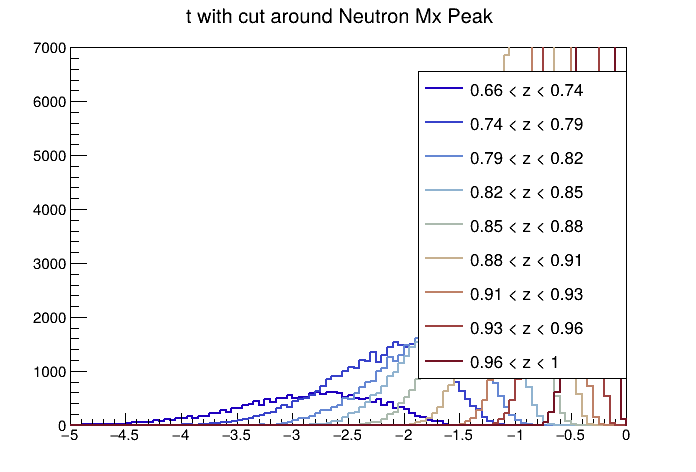

In [10]:
c_tvsz = ROOT.TCanvas()
ROOT.gStyle.SetPalette(ROOT.kThermometer)
zbin_edgs = [0.66, 0.74, 0.79, 0.82, 0.85, 0.88, 0.91, 0.93, 0.96, 1]
nbins = len(zbin_edgs)-1
baseColor = 51
histograms = []
for i in range(nbins):
    chain.Draw(f"t_elec>>h{i}(100,-5,0)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05&& {zbin_edgs[i]}<z&&z<{zbin_edgs[i+1]}","goff")

    hist = ROOT.gDirectory.Get(f"h{i}")
    hist.SetLineWidth(2)
    #color = baseColor + int((float(i) / (nbins - 1)) * 5)
    #hist.SetLineColor(color)
    histograms.append(hist)
    print(hist.GetEntries())


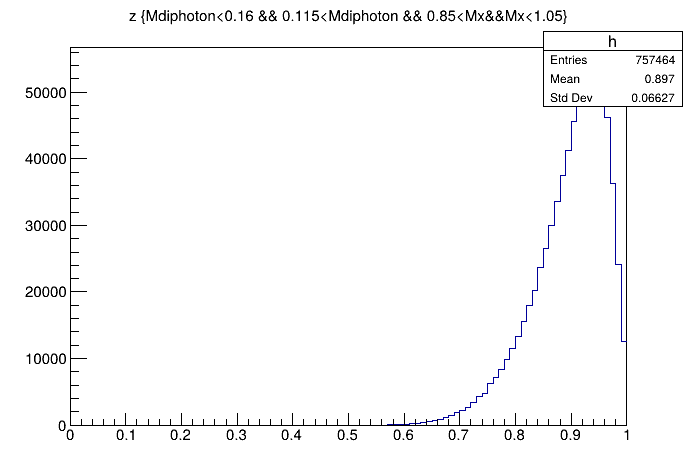

In [48]:
c = ROOT.TCanvas()
chain.Draw("z>>h(100,0,1)","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx&&Mx<1.05")
c.Draw()

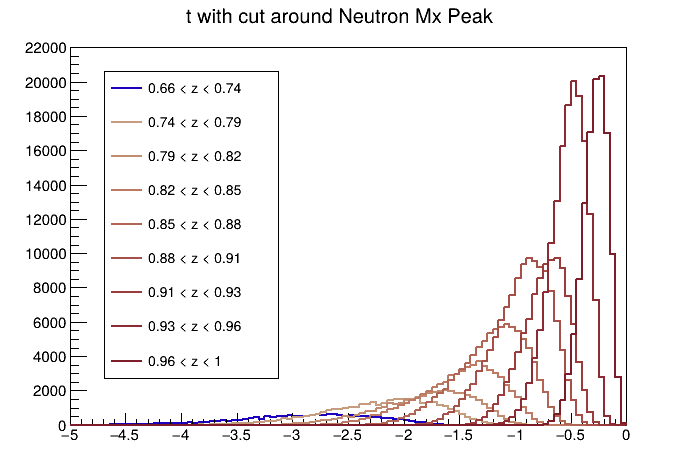

In [17]:
c_tvsz.cd()
leg = ROOT.TLegend(0.15,0.2,0.4,0.85)
t_avg = []
for i, hist in enumerate(histograms):
    leg.AddEntry(hist,f"{zbin_edgs[i]} < z < {zbin_edgs[i+1]}","l")
    t_avg.append(hist.GetMean())
    if i ==0:
        hist.SetStats(0)
        hist.SetTitle("t with cut around Neutron Mx Peak")
        hist.GetYaxis().SetRangeUser(0,22000)
    else:
        hist.Draw("PLC SAME")

leg.Draw()
c_tvsz.Draw()

In [18]:
print(t_avg)

[-2.872272541222379, -2.1903016499645593, -1.793898108470542, -1.4952033253357273, -1.2118047113730464, -0.9393048132529914, -0.728215387994583, -0.5209634128382687, -0.2850192095141948]


In [44]:
zbin_edges = [0.66,0.88,0.935,1]
chain.Draw("z>>h(100,0.6,1)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05 && {zbin_edges[0]}<z&&z<{zbin_edges[1]}","goff")
chain.Draw("z>>h1(100,0.6,1)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05 && {zbin_edges[1]}<z&&z<{zbin_edges[2]}","goff")
chain.Draw("z>>h2(100,0.6,1)",f"Mdiphoton<0.16 && 0.115<Mdiphoton&&0.85<Mx && Mx < 1.05 && {zbin_edges[2]}<z&&z<{zbin_edges[3]}","goff")

252658

bin0 - 32.91%, bin1 - 33.43%, bin2 - 33.66%


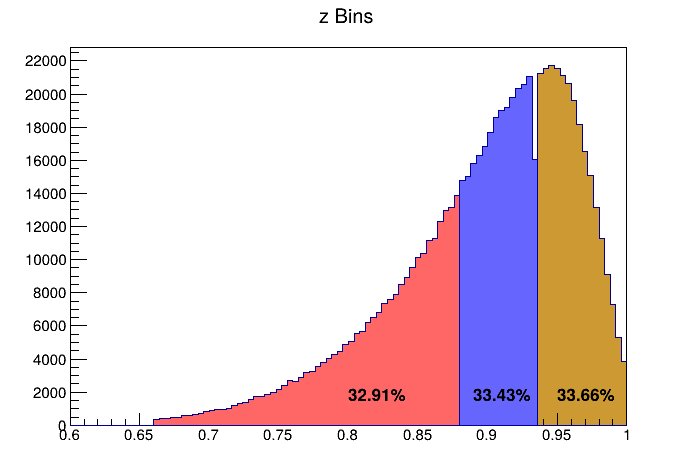

In [48]:
c3 = ROOT.TCanvas()


h = ROOT.gDirectory.Get("h")
h1 = ROOT.gDirectory.Get("h1")
h2 = ROOT.gDirectory.Get("h2")

tot = h.GetEntries() + h1.GetEntries() + h2.GetEntries()
bin0 = h.GetEntries()/tot * 100
bin1 = h1.GetEntries()/tot * 100
bin2 = h2.GetEntries()/tot * 100

h.SetFillColor(ROOT.kRed-7)
h1.SetFillColor(ROOT.kBlue-7)
h2.SetFillColor(ROOT.kOrange-5)
latex=ROOT.TLatex()
latex.SetTextSize(0.04)


print(f"bin0 - {round(bin0,2)}%, bin1 - {round(bin1,2)}%, bin2 - {round(bin2,2)}%")

h2.SetTitle("z Bins")
h2.SetStats(0)
h2.Draw()
h.Draw("SAME")
h1.Draw("SAME")
latex.DrawLatexNDC(0.5,0.15,f"{round(bin0,2)}%")
latex.DrawLatexNDC(0.68,0.15,f"{round(bin1,2)}%")
latex.DrawLatexNDC(0.8,0.15,f"{round(bin2,2)}%")
c3.Draw()

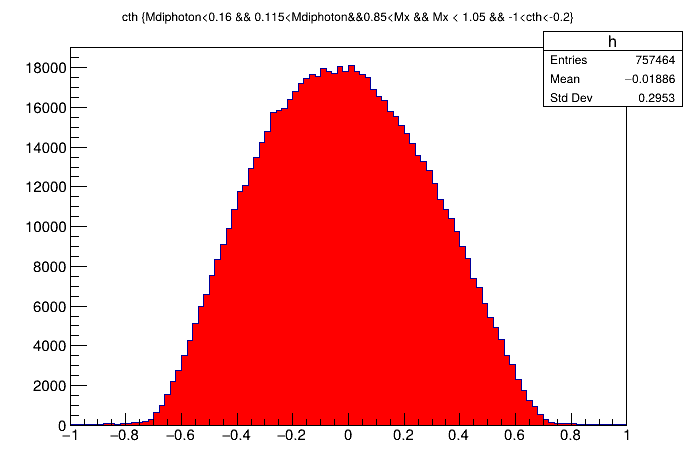

In [8]:
c1 = ROOT.TCanvas()
h.Draw()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


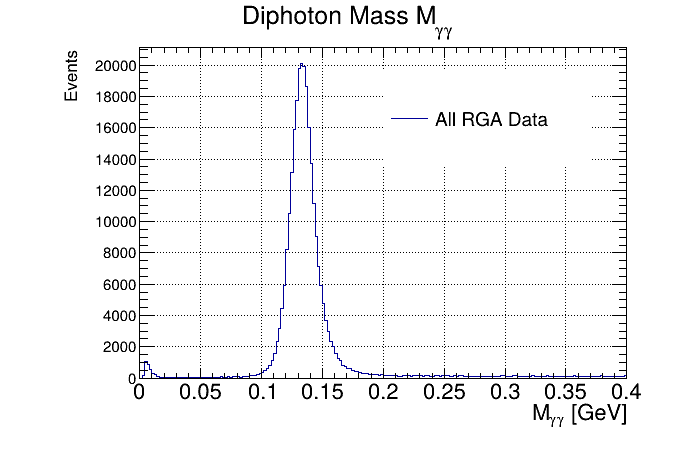

In [10]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Diphoton Mass M_{#gamma#gamma};M_{#gamma#gamma} [GeV];Events",200,0.0,0.4)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"All RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("Mdiphoton>>h","0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


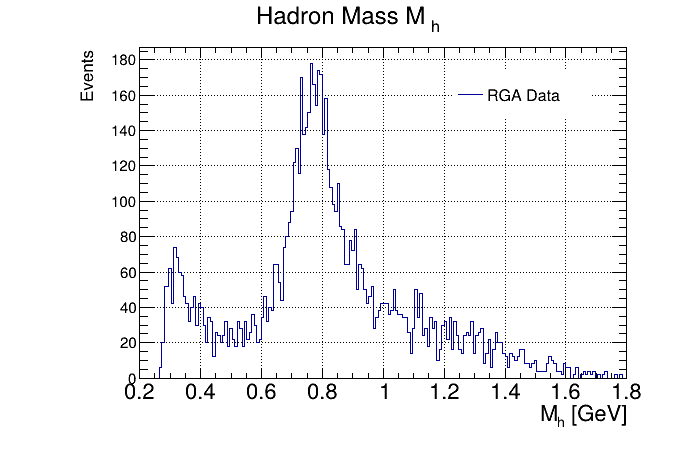

In [10]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Hadron Mass M_{h};M_{h} [GeV];Events",200,0.2,1.8)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("Mh>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05 &&cth>0.6&&cth<0.8","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


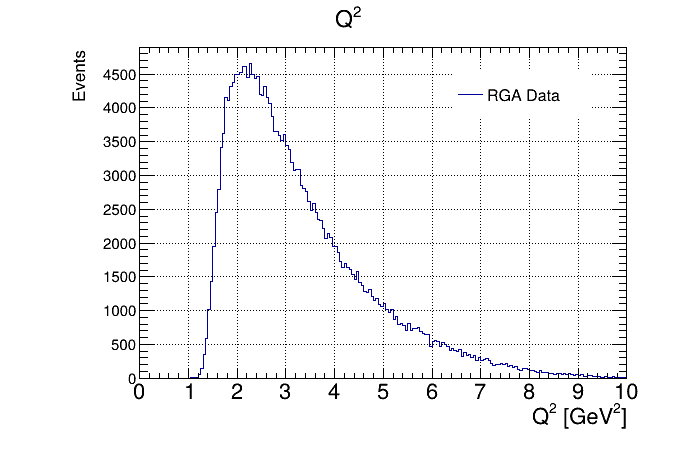

In [12]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Q^{2};Q^{2} [GeV^{2}];Events",200,0,10)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("Q2>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


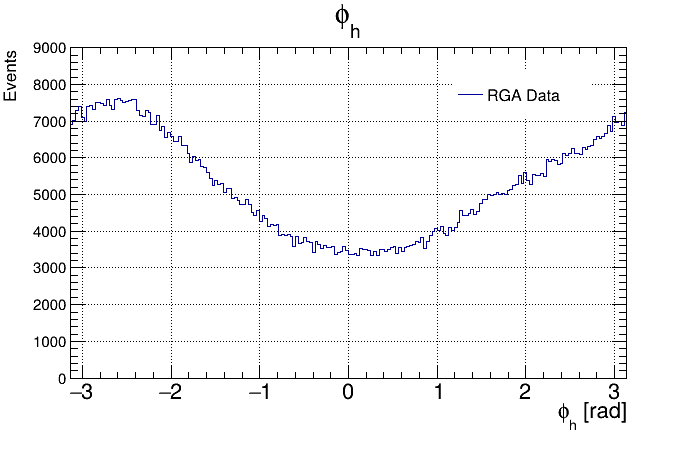

In [14]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","#phi_{h};#phi_{h} [rad];Events",200,-3.14,3.14)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)

h.GetYaxis().SetRangeUser(0,9000)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)

chain.Draw("phi>>h","0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

In [18]:
c1 = ROOT.TCanvas()
chain.Draw("xF>>h(100,-1,1)","","")
chain.Draw("xF1>>h1(100,-1,1)","","")
chain.Draw("xF2>>h2(100,-1,1)","","")


40941520

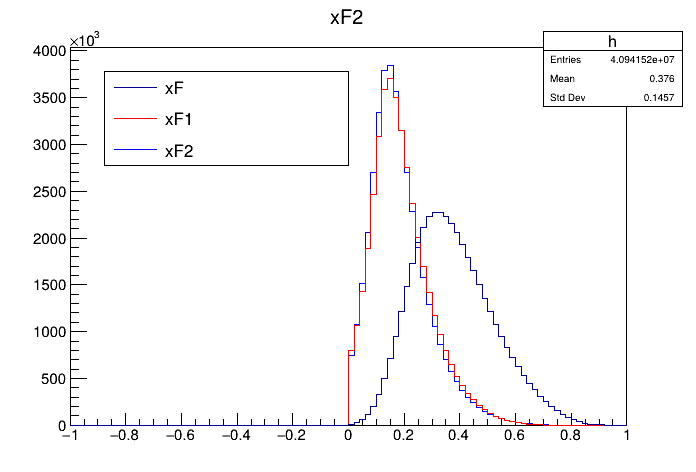

In [21]:
h = ROOT.gDirectory.Get("h")
h1 = ROOT.gDirectory.Get("h1")
h1.SetLineColor(ROOT.kRed)
h2 = ROOT.gDirectory.Get("h2")
h2.SetLineColor(ROOT.kBlue)
leg = ROOT.TLegend(0.15,0.65,0.5,0.85)
leg.AddEntry(h,"xF","l")
leg.AddEntry(h1,"xF1","l")
leg.AddEntry(h2,"xF2","l")

h2.Draw()
h1.Draw("SAME")
h.Draw("SAME")
leg.Draw()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


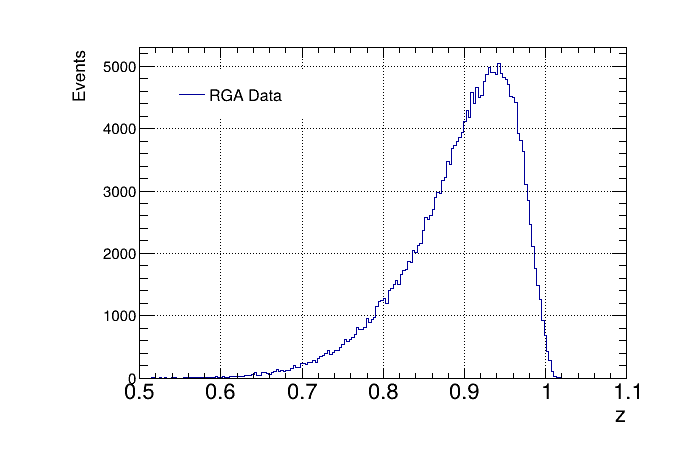

In [14]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h",";z;Events",200,0.5,1.1)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.25,0.75,0.45,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("z>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


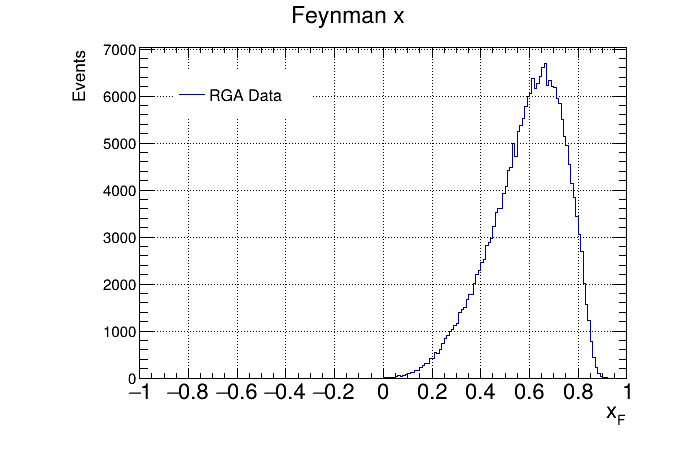

In [15]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Feynman x;x_{F};Events",200,-1,1)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.25,0.75,0.45,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("xF>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


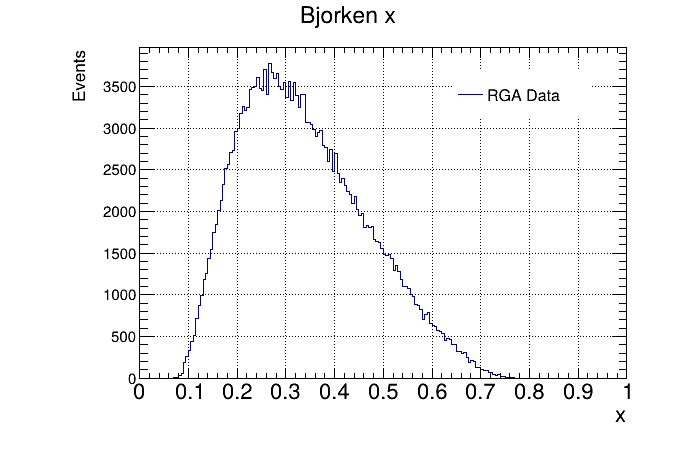

In [16]:
c = ROOT.TCanvas()#"c","c",800,600)
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h = ROOT.TH1F("h","Bjorken x;x;Events",200,0,1)
h.SetStats(0)
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.04)
h.GetXaxis().SetLabelSize(0.05)
#h.GetYaxis().SetLabelSize(0.05)

leg = ROOT.TLegend(0.65,0.75,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h,"RGA Data","l") #name of object being referred, "title shown", (fit line or point)
leg.SetBorderSize(0)

ROOT.gPad.SetBottomMargin(0.2)
ROOT.gPad.SetLeftMargin(0.2)

chain.Draw("x>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
leg.Draw()
c.Draw()

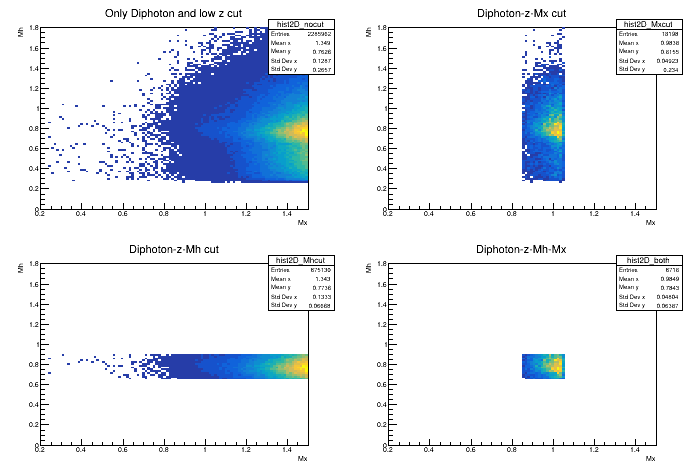

In [5]:
hist2D_nocut = ROOT.TH2F("hist2D_nocut","Only Diphoton and low z cut;Mx;Mh",100,0.2,1.5,100,0,1.8)
hist2D_Mxcut = ROOT.TH2F("hist2D_Mxcut","Diphoton-z-Mx cut;Mx;Mh",100,0.2,1.5,100,0,1.8)
hist2D_Mhcut = ROOT.TH2F("hist2D_Mhcut","Diphoton-z-Mh cut;Mx;Mh",100,0.2,1.5,100,0,1.8)
hist2D_both = ROOT.TH2F("hist2D_both","Diphoton-z-Mh-Mx;Mx;Mh",100,0.2,1.5,100,0,1.8)
c = ROOT.TCanvas()
c.Divide(2,2)
chain.Draw("Mh:Mx>>hist2D_nocut","0.66<z&&z<0.74&&Mdiphoton<0.16 && 0.115<Mdiphoton","goff")
chain.Draw("Mh:Mx>>hist2D_Mxcut","0.66<z&&z<0.74&&Mdiphoton<0.16 && 0.115<Mdiphoton&& 0.85<Mx && Mx < 1.05","goff")
chain.Draw("Mh:Mx>>hist2D_Mhcut","0.66<z&&z<0.74&&Mdiphoton<0.16 && 0.115<Mdiphoton&& 0.65<Mh&&Mh<0.9","goff")
chain.Draw("Mh:Mx>>hist2D_both","0.66<z&&z<0.74&&Mdiphoton<0.16 && 0.115<Mdiphoton&& 0.65<Mh&&Mh<0.9&& 0.85<Mx && Mx < 1.05","goff")
c.cd(1)
hist2D_nocut.Draw()
c.cd(2)
hist2D_Mxcut.Draw()
c.cd(3)
hist2D_Mhcut.Draw()
c.cd(4)
hist2D_both.Draw()
c.Draw()

## Comparing IN/OUT bending

In [2]:
f_in = ROOT.TFile("out/pippi0_fall2018_in_pass1/pippi0_fall2018_in_pass1.root")
f_out = ROOT.TFile("out/pippi0_fall2018_out_pass1/pippi0_fall2018_out_pass1.root")

In [9]:
t_in = f_in.Get("pippi0")
t_out = f_out.Get("EventTree") #0.8921999931335449

In [10]:
[b.GetName() for b in t_in.GetListOfBranches()]

['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true']

h_in entries: 242260.0
h_out entries: 311400.0


Warning in <TFile::Append>: Replacing existing TH1: h_in (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_out (Potential memory leak).


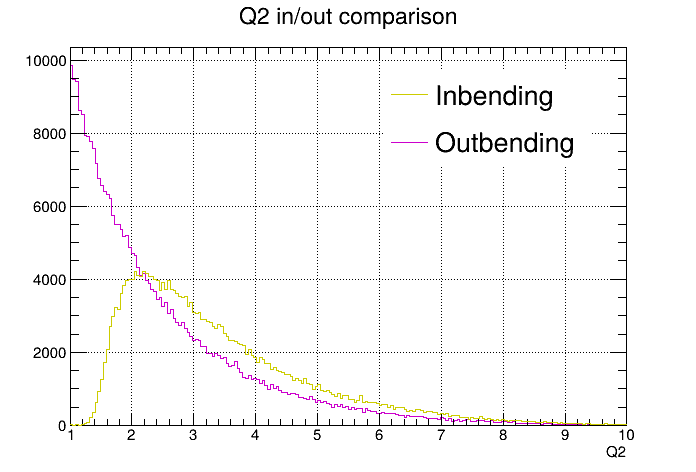

In [59]:
c = ROOT.TCanvas()
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h_in = ROOT.TH1F("h_in", "h_in",200,1,10)
h_in.SetStats(0)
h_in.SetLineColor(ROOT.kGreen-15) #color-opacity


h_out = ROOT.TH1F("h_out", "Q2 in/out comparison;",200,1,10)
h_out.SetLineColor(ROOT.kRed-15) #color-opacity
h_out.SetStats(0)

#max_y = max(h_in.GetMaximum(), h_out.GetMaximum())
#h_in.SetMaximum(1.1 * max_y)
#_out.SetMaximum(1.1 * max_y)


t_in.Project("h_in","Q2","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
t_out.Project("h_out","Q2","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
print("h_in entries:",h_in.GetEntries())
print("h_out entries:", h_out.GetEntries())

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h_in,"Inbending","l") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(h_out,"Outbending","l")
leg.SetBorderSize(0)

h_out.Draw("h_out")
h_in.Draw("same")


leg.Draw()
#t_in.Draw("Q2>>h_in","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
#t_out.Draw("Q2>>h_out","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
c.Draw()

h_in entries: 230681768.0
h_out entries: 220528864.0


Warning in <TFile::Append>: Replacing existing TH1: h_in (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_out (Potential memory leak).


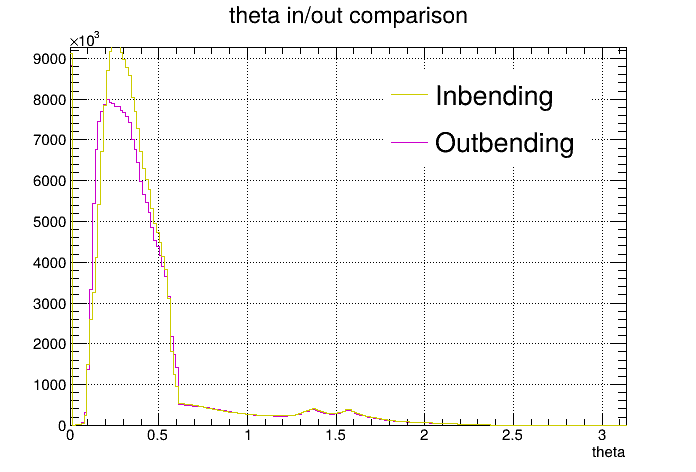

In [74]:
c = ROOT.TCanvas()
c.SetTickx()
c.SetTicky()
c.SetGridx()
c.SetGridy()

h_in = ROOT.TH1F("h_in", "h_in",200,0,3.14)
h_in.SetStats(0)
h_in.SetLineColor(ROOT.kGreen-15) #color-opacity


h_out = ROOT.TH1F("h_out", "theta in/out comparison;theta",200,0,3.14)
h_out.SetLineColor(ROOT.kRed-15) #color-opacity
h_out.SetStats(0)

#max_y = max(h_in.GetMaximum(), h_out.GetMaximum())
#h_in.SetMaximum(1.1 * max_y)
#_out.SetMaximum(1.1 * max_y)


t_in.Project("h_in","theta")#,"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
t_out.Project("h_out","theta")#,"Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
print("h_in entries:",h_in.GetEntries())
print("h_out entries:", h_out.GetEntries())

leg = ROOT.TLegend(0.55,0.65,0.85,0.85) #xmin,ymin,xmax.ymax
leg.AddEntry(h_in,"Inbending","l") #name of object being referred, "title shown", (fit line or point)
leg.AddEntry(h_out,"Outbending","l")
leg.SetBorderSize(0)

h_out.Draw("h_out")
h_in.Draw("same")


leg.Draw()
#t_in.Draw("Q2>>h_in","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
#t_out.Draw("Q2>>h_out","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.85<Mx && Mx < 1.05","")
c.Draw()

## Monte Carlo

In [4]:
inputFiles = ["out/MC_pippi0_fall2018_in_pass2/MC_pippi0_fall2018_in_pass2_1.root","out/MC_pippi0_fall2018_in_pass2/MC_pippi0_fall2018_in_pass2.root"]
chain = ROOT.TChain("pippi0")
for f in inputFiles:
    chain.Add(f)

In [5]:
[b.GetName() for b in chain.GetListOfBranches()]

['hel',
 'run',
 'x',
 'eps',
 'gamma',
 'x_true',
 'Q2',
 'Q2_true',
 'z',
 'pT',
 'xF',
 'xF1',
 'xF2',
 'phi',
 'Mx',
 'Mh',
 'z_true',
 'pT_true',
 'xF_true',
 'xF1_true',
 'xF2_true',
 'phi_true',
 'Mx_true',
 'Mh_true',
 'Mdiphoton',
 'Mdiphoton_true',
 'th',
 'th_true',
 'cth',
 'cth_true',
 'MCtrue_containsNeutron',
 'truepho1_pid',
 'truepho2_pid',
 'truepip_pid']

Warning in <TFile::Init>: file out/MC_pippi0_fall2018_in_pass2/MC_pippi0_fall2018_in_pass2_1.root has no keys
Error in <TChain::LoadTree>: Cannot find tree with name pippi0 in file out/MC_pippi0_fall2018_in_pass2/MC_pippi0_fall2018_in_pass2_1.root


In [33]:
c = ROOT.TCanvas()
h = ROOT.TH1F("h","h",100,0.5,3.5)
h1 = ROOT.TH1F("h1","h1",100,0.5,3.5)
chain.Draw("Mx>>h","Mdiphoton<0.16 && 0.115<Mdiphoton && 0.65<Mh&&Mh<0.9 && 0.93<z &&z<0.96","")
chain.Draw("Mx>>h1","Mdiphoton<0.16 && 0.115<Mdiphoton &&0.65<Mh&&Mh<0.9 && truepho1_pid==22 && truepho2_pid==22 && truepip_pid==211 && MCtrue_containsNeutron==1 && 0.93<z &&z<0.96","") #&& truepho1_pid==22 && truepho2_pid==22 && truepip_pid==211 && MCtrue_containsNeutron==1



3004

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


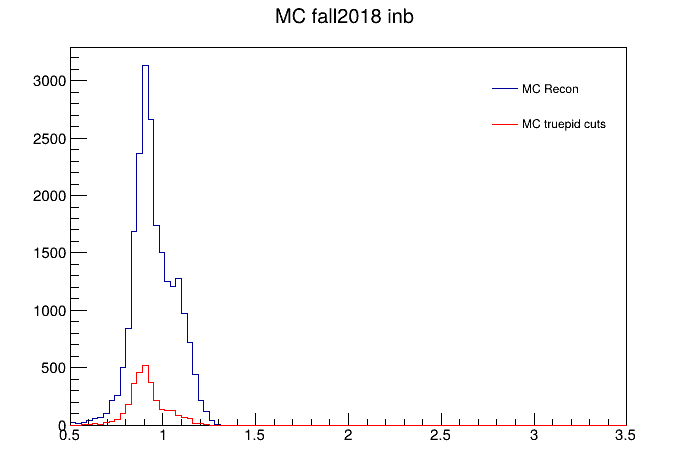

In [34]:
h1.SetLineColor(ROOT.kRed)
h.SetStats(0)
leg = ROOT.TLegend(0.7,0.7,0.9,0.85)
leg.AddEntry(h,"MC Recon","l")
leg.AddEntry(h1,"MC truepid cuts ","l")
leg.SetBorderSize(0)
h.SetTitle("MC fall2018 inb")
h.Draw()
h1.Draw("SAME")
leg.Draw()
c.Draw()